In [1]:
import pandas as pd
import numpy as np
import time
import zipfile
import io
import requests
from matplotlib import pyplot as plt

Tweets (comptes agafats)

In [2]:
url = 'https://raw.githubusercontent.com/AlbertRoca29/EconomiaCircular/main/Tweets.csv'

T = pd.read_csv(url)

Tweets (tots)

In [3]:
url = 'https://github.com/AlbertRoca29/EconomiaCircular/blob/main/Tweets_All.zip?raw=true'

response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
csv_file = zip_file.open('Tweets_All.csv')

T_All = pd.read_csv(csv_file)

<ipython-input-3-587c29d93dd2>:7: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  T_All = pd.read_csv(csv_file)


Anàlisi T

In [4]:
T['Date'] = pd.to_datetime(T['Date'])

<Axes: >

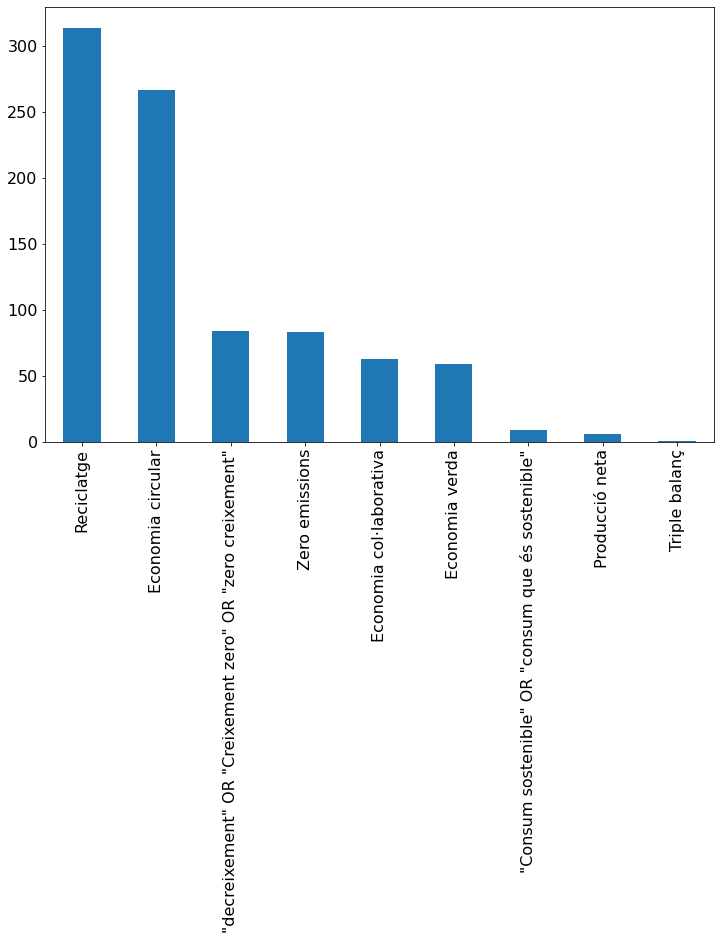

In [5]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 16
T['Paraula'].value_counts().plot(kind='bar')

<Axes: >

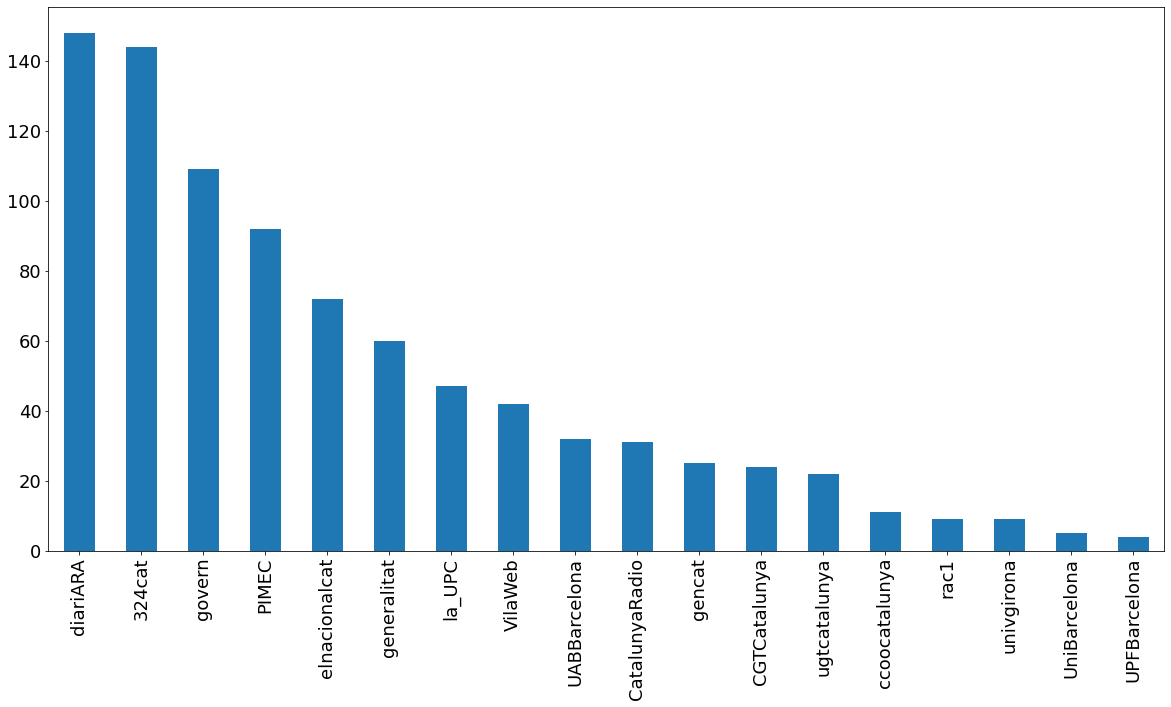

In [6]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
T['User'].value_counts().plot(kind='bar')

([<matplotlib.axis.XTick at 0x7f68b2de0f10>,
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021'),
  Text(14, 0, '2022'),
  Text(15, 0, '2023')])

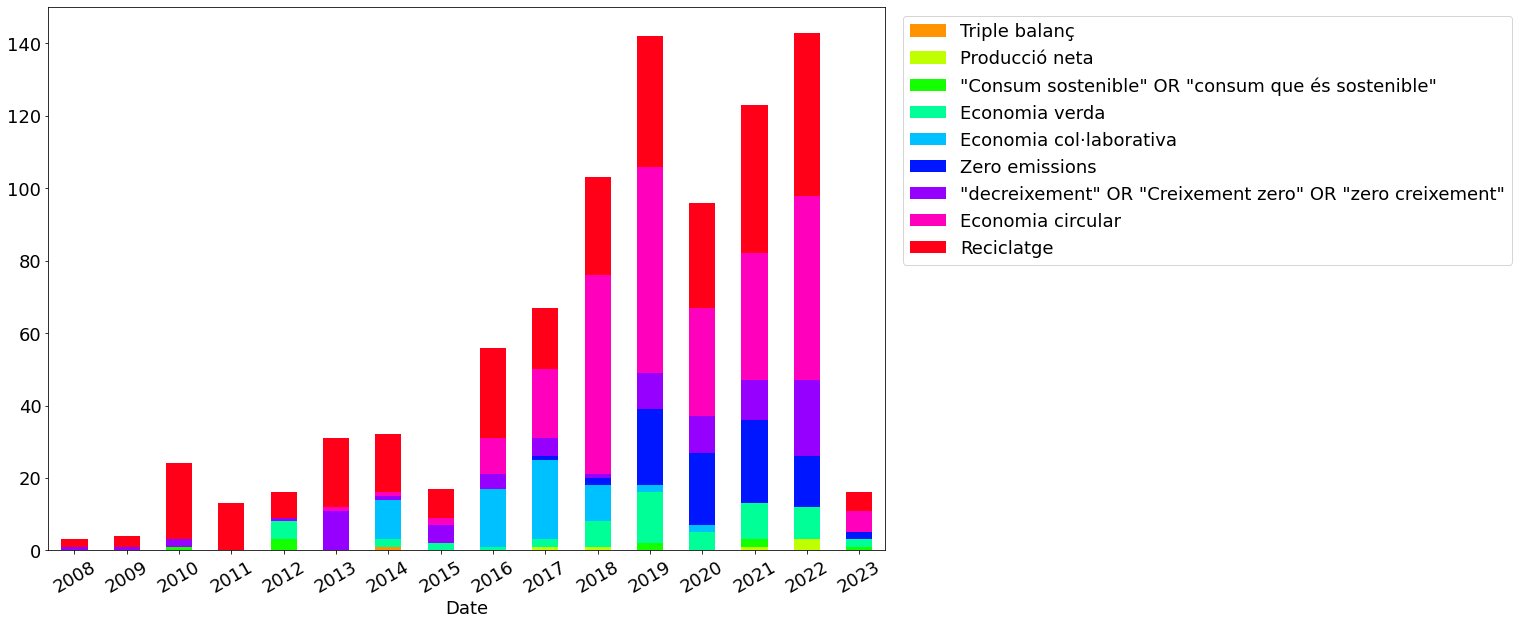

In [7]:
plt.figure(figsize=(15,10))
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0.1, 1, len(np.unique(T['Paraula']))))
i=0
bot = 0
year =   T[T['Paraula']=='Reciclatge'].groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()
year-=year

for paraula in list(T['Paraula'].value_counts().sort_values().keys()):
    T_p = T[T['Paraula']==paraula]
    year = (year + T_p.groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()).fillna(0)
    year.plot(kind='bar',color=colors[i],label=paraula,bottom=bot)
    bot += year
    plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
    i+=1
    year-=year

plt.xticks(np.arange(16), np.arange(2008,2024),rotation=30)

In [8]:
list(T['Paraula'].value_counts().sort_values().keys())

['Triple balanç',
 'Producció neta',
 '"Consum sostenible" OR "consum que és sostenible"',
 'Economia verda',
 'Economia col·laborativa',
 'Zero emissions',
 '"decreixement" OR "Creixement zero" OR "zero creixement"',
 'Economia circular',
 'Reciclatge']

Analisi T_All

In [9]:
T_All['Date']

0         2023-03-17 16:12:34+00:00
1         2023-01-30 13:09:40+00:00
2         2022-12-23 07:24:47+00:00
3         2022-12-15 07:46:50+00:00
4         2022-11-21 15:54:34+00:00
                    ...            
302180    2012-11-08 15:14:26+00:00
302181    2012-10-16 06:06:46+00:00
302182    2011-09-20 21:09:38+00:00
302183    2011-01-12 06:52:52+00:00
302184    2010-02-22 21:01:16+00:00
Name: Date, Length: 302185, dtype: object

In [10]:
T_All['Date'] = pd.to_datetime(T_All['Date'],errors='coerce')

([<matplotlib.axis.XTick at 0x7f68b1fb67f0>,
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021'),
  Text(14, 0, '2022'),
  Text(15, 0, '2023')])

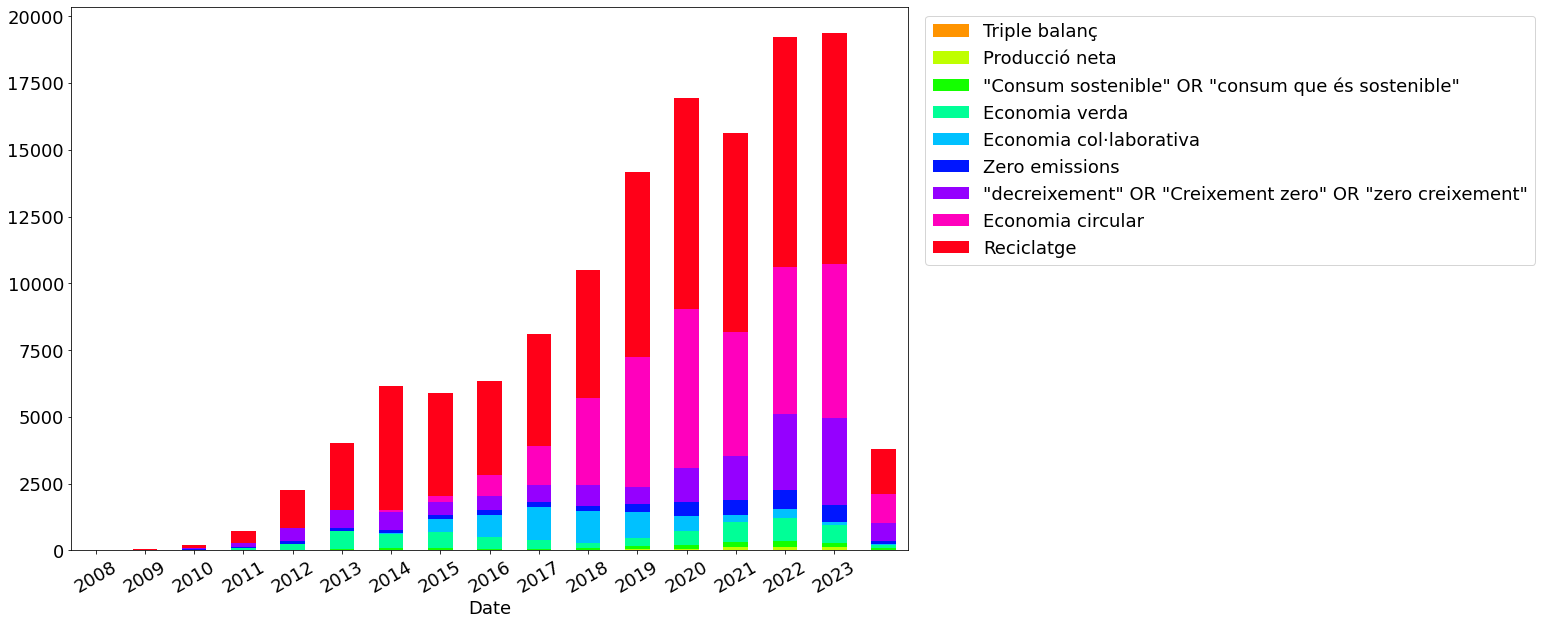

In [11]:
plt.figure(figsize=(15,10))
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0.1, 1, len(np.unique(T['Paraula']))))
i=0
bot = 0
year =   T_All[T_All['Paraula']=='Reciclatge'].groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()
year-=year

for paraula in list(T['Paraula'].value_counts().sort_values().keys()):
    T_p = T_All[T_All['Paraula']==paraula]
    year = (year + T_p.groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()).fillna(0)
    year.plot(kind='bar',color=colors[i],label=paraula,bottom=bot)
    bot += year
    plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
    i+=1
    year-=year

plt.xticks(np.arange(16), np.arange(2008,2024),rotation=30)

In [12]:
T_All['Coords']

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
302180    Coordinates(longitude=-73.991482, latitude=-33...
302181                                                  NaN
302182                                                  NaN
302183                                                  NaN
302184                                                  NaN
Name: Coords, Length: 302185, dtype: object

In [13]:
def extreure(coordenada,xy='long'):
    if(type(coordenada)!=str):
        return coordenada
    lon, lat = coordenada.replace("Coordinates(", "").replace(")", "").replace("longitude=", "").replace("latitude=", "").split(",")
    if(xy=='long'):
        return float(lon)
    return float(lat)

T_All["long"] = T_All["Coords"].apply(extreure,xy = 'long')
T_All["lat"] = T_All["Coords"].apply(extreure,xy = 'lat')

In [15]:
T_All.head(40)

,Unnamed: 0,Date,User,Tweet,Paraula,Coords,long,lat
0,0,2023-03-17 16:12:34+00:00,Aj_Tordera,✅🤝 Té com a objectiu treballar per la minimitz...,Minimització de residus,NaN,NaN,NaN
1,1,2023-01-30 13:09:40+00:00,riberavalldigna,📣 Aquest matí ens hem reunit amb els represent...,Minimització de residus,NaN,NaN,NaN
2,2,2022-12-23 07:24:47+00:00,ElMillorResidu,El Millor Residu com a Servei d'Educació Ambie...,Minimització de residus,NaN,NaN,NaN
3,3,2022-12-15 07:46:50+00:00,ElMillorResidu,Hem tornat al CEIP Don José Alba de La #Vilave...,Minimització de residus,NaN,NaN,NaN
4,4,2022-11-21 15:54:34+00:00,serrapla,Ja fa temps que hem anat substituint l'ús de p...,Minimització de residus,NaN,NaN,NaN
5,5,2022-11-10 12:05:34+00:00,EmtreEntitat,@etsinfupv 🎯 Objectius? \n-Conscienciar la com...,Minimització de residus,NaN,NaN,NaN
6,6,2022-10-31 16:26:26+00:00,CircularAndorra,Un dels conceptes claus en l'economia circular...,Minimització de residus,NaN,NaN,NaN
7,7,2022-10-13 15:45:00+00:00,TGNAjuntament,"CIUTAT | 👶 La plaça dels Carros acull, aquest ...",Minimització de residus,NaN,NaN,NaN
8,8,2022-10-11 06:48:34+00:00,project_necada,Nous assoliments en l’adopció de la fusta com ...,Minimització de residus,NaN,NaN,NaN
9,9,2022-09-06 21:03:02+00:00,FarranPere,@josepribasicoll @aserracam @ramontm @SofiaSim...,Minimització de residus,NaN,NaN,NaN


In [16]:
import plotly.express as px
import pandas as pd

mapbox_token = "pk.eyJ1IjoiYXp1YmFyY28iLCJhIjoiY2s0OHRtbDNsMGI5YTNrcHJueWV3N20zdCJ9.qpTrQEyiBNskROz38Ggc3Q" # substitueix xxxx pel teu token

fig = px.scatter_mapbox(T_All,
                        lat="lat",
                        lon="long",
                        zoom=4)

fig.update_layout(mapbox_accesstoken=mapbox_token)
fig.write_html("mapa.html")
fig.show()


In [17]:
print(sum(~np.isnan(T_All['lat']))/T_All.shape[0])

0.013925244469447524
